# Vector Algebra


The best way to work with matrices and vectors in Python is through the numpy library. We will
look at numpy in this tutorial. In Python, we use numpy arrays for vectors (and matrices). These are defined using the `.array`
method in `numpy`.



In [1]:
import numpy as np

x = np.array([1.1343, 6.2345, 35])
print(x)


[ 1.1343  6.2345 35.    ]


To mulitply a vector by a scalar, we use the `*` command:

In [2]:

z = 7 * np.ones(3)
print(z)

[7. 7. 7.]


To add vectors, we can use the `+` command:

In [3]:
a = np.array([1.5, 4, 3.2])
b = np.array([2, 2.2, -1])
c = a + b
print(c)

[3.5 6.2 2.2]


To divide vectors element-by-element, we use `np.divide`

In [4]:
arr1 = [2, 27, 2, 21, 23] 
arr2 = [2, 3, 4, 5, 6] 
print ("arr1         : ", arr1) 
print ("arr2         : ", arr2) 
  
# output_array 
out = np.divide(arr1, arr2) 
print ("\nOutput array : \n", out) 

arr1         :  [2, 27, 2, 21, 23]
arr2         :  [2, 3, 4, 5, 6]

Output array : 
 [1.         9.         0.5        4.2        3.83333333]


We can also conveniently perform dot and cross products: 

In [5]:
a = np.array([-1, -1, -1])
b = np.array([11, 22, 33])
adotb = np.dot(a, b)
print (adotb)


-66


In [6]:
a = np.array([-1, -1, -1])
b = np.array([11, 22, 33])
acrossb = np.cross(a,b)
print (acrossb)

[-11  22 -11]


Use the above code to check that for a pair of vectors, which you can create, that the order you perform the dot product does not affect the final result, but the order in which you take the cross product does result in different vectors.

In [10]:
from numpy import random
vec_x = np.array([random.randint(100), random.randint(100), random.randint(100)])
vec_y = np.array([random.randint(100), random.randint(100), random.randint(100)])

x_dot_y = vec_x * vec_y
y_dot_x = vec_y * vec_x

print("Vector x: ", vec_x, "\n Vector y: ", vec_y) 
print("Vector x * y: ", x_dot_y, "\n Vector y * x: ", y_dot_x)

Vector x:  [54 61 41] 
 Vector y:  [25  7 37]
Vector x * y:  [1350  427 1517] 
 Vector y * x:  [1350  427 1517]


# Vector Calculus

Python doesn't have particularly convenient means for calculating div, grad, and curl, but here are some example pieces of code your may wish to use.



Below is an example of the `np.gradient` function:




In [7]:
import numpy as np
f = np.array([1, 2, 4, 7, 11, 16])
np.gradient(f)


array([1. , 1.5, 2.5, 3.5, 4.5, 5. ])

You can use `sympy.curl()` to calculate the curl of a vector field.

Example:

Suppose F(x,y,z) = y2zi - xyj + z2k, then:

y would be R[1], x is R[0] and z is R[2]
the unit vectors i, j, k of the 3 axes, would be respectively R.x, R.y, R.z.
The code to calculate the vector field curl is:

In [8]:
from sympy.physics.vector import ReferenceFrame
from sympy.physics.vector import curl
R = ReferenceFrame('R')

F = R[1]**2 * R[2] * R.x - R[0]*R[1] * R.y + R[2]**2 * R.z

G = curl(F, R)
print(G)

R_y**2*R.y + (-2*R_y*R_z - R_y)*R.z


To calculate the curl of a vector function you can also use `numdifftools` for automatic numerical differentiation without a detour through symbolic differentiation. Numdifftools doesn't provide a curl() function, but it does compute the Jacobian matrix of a vector valued function of one or more variables, and this provides the derivatives of all components of a vector field with respect to all of the variables; this is all that's necessary for the calculation of the curl. This is quite a bit beyond what we need in terms of Python skills, but you can check out the code here: https://www.eg.bucknell.edu/~phys310/jupyter/numdiff.html

# References

https://cbrinton.net/ECE20875-2020-Fall/W9/numpy-demo.pdf


https://stackoverflow.com/questions/30378676/calculate-curl-of-a-vector-field-in-python-and-plot-it-with-matplotlib

# Research

One very common problem in physics is calculating the gradient of a vector field because our forces in physics are represented as force fields. For example, let's imagine an electric potential modeled by the equation V = e^(-1/(x^2 + y^2 + z^2)). We can calculate the vector field of electric force by taking the gradient of our potential equation. I went ahead and did this below, but that's not that impressive, what is helpful is the ability to see the vector field in 3 dimensions which python does allow for. When we plot this vector field we can imagine droping a charged particle in this field and it "flowing" along with the vector lines. 

I just wish I could make the plot bigger and rotatable!

/tmp/ipykernel_71532/556670183.py:16: RuntimeWarning: divide by zero encountered in divide
  V = np.exp(-1/(x**2 +y**2 + z**2)) # Define a potential function


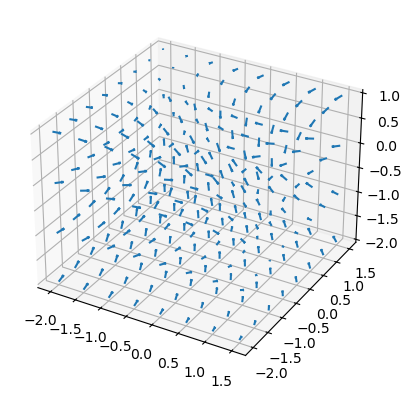

<Figure size 1000x1000 with 0 Axes>

In [3]:
%reset -f
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from numpy import gradient
%matplotlib inline

# Creating our array of x, y, and z values.
ax = plt.figure().add_subplot(projection='3d')
x, y, z = np.meshgrid(np.arange(-2, 2, 0.5), # Make the grid
                      np.arange(-2, 2, 0.5),
                      np.arange(-2, 2, 1))


# Physics Stuff! 
V = np.exp(-1/(x**2 +y**2 + z**2)) # Define a potential function
E_x, E_y, E_z = gradient(V) # solve for electric force


# Graph Stuff: 
ax.quiver(x, y, z, -E_x, -E_y, -E_z, length=0.15, normalize=True)
plt.figure(figsize=(10, 10))
plt.show()